# ĐỌC FILE

In [ ]:
import pandas as pd

df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

# Hiển thị 5 dòng đầu tiên để xem dữ liệu
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# PHÂN TÍCH EDA

## Độ lớn bộ dữ liệu

In [ ]:
print(df.shape)

(5110, 12)


## Phân tích trực quan

### Kiểu dữ liệu

In [ ]:
import pandas as pd

summary = pd.DataFrame({
    'dtype': df.dtypes,
    'unique_values': df.apply(lambda x: x.unique()[:10]),  # Lấy tối đa 10 giá trị unique
    'null_count': df.isnull().sum()
})

summary

,dtype,unique_values,null_count
id,int64,"[9046, 51676, 31112, 60182, 1665, 56669, 53882...",0
gender,object,"[Male, Female, Other]",0
age,float64,"[67.0, 61.0, 80.0, 49.0, 79.0, 81.0, 74.0, 69....",0
hypertension,int64,"[0, 1]",0
heart_disease,int64,"[1, 0]",0
ever_married,object,"[Yes, No]",0
work_type,object,"[Private, Self-employed, Govt_job, children, N...",0
Residence_type,object,"[Urban, Rural]",0
avg_glucose_level,float64,"[228.69, 202.21, 105.92, 171.23, 174.12, 186.2...",0
bmi,float64,"[36.6, nan, 32.5, 34.4, 24.0, 29.0, 27.4, 22.8...",201


### Tập giá trị của từng cột

In [ ]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Column '{col}' has {len(unique_values)} unique values:")
    print(unique_values)
    print('-' * 40)

Column 'id' has 5110 unique values:
[ 9046 51676 31112 ... 19723 37544 44679]
----------------------------------------
Column 'gender' has 3 unique values:
['Male' 'Female' 'Other']
----------------------------------------
Column 'age' has 104 unique values:
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1

Nhận xét:


*   Các cột có giá trị dạng numeric là age, avg_glucose_level và bmi
*   Các cột còn lại là gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status, stroke có kiểu dữ liệu categorical. Trong đó, work_type và smoking_status có nhiều nhãn. Các cột này đều sẽ được xử lí bằng Label Encoder



###  NULL

In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


### Xử lí NULL

In [ ]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

### Outlier

#### Quan sát trực quan

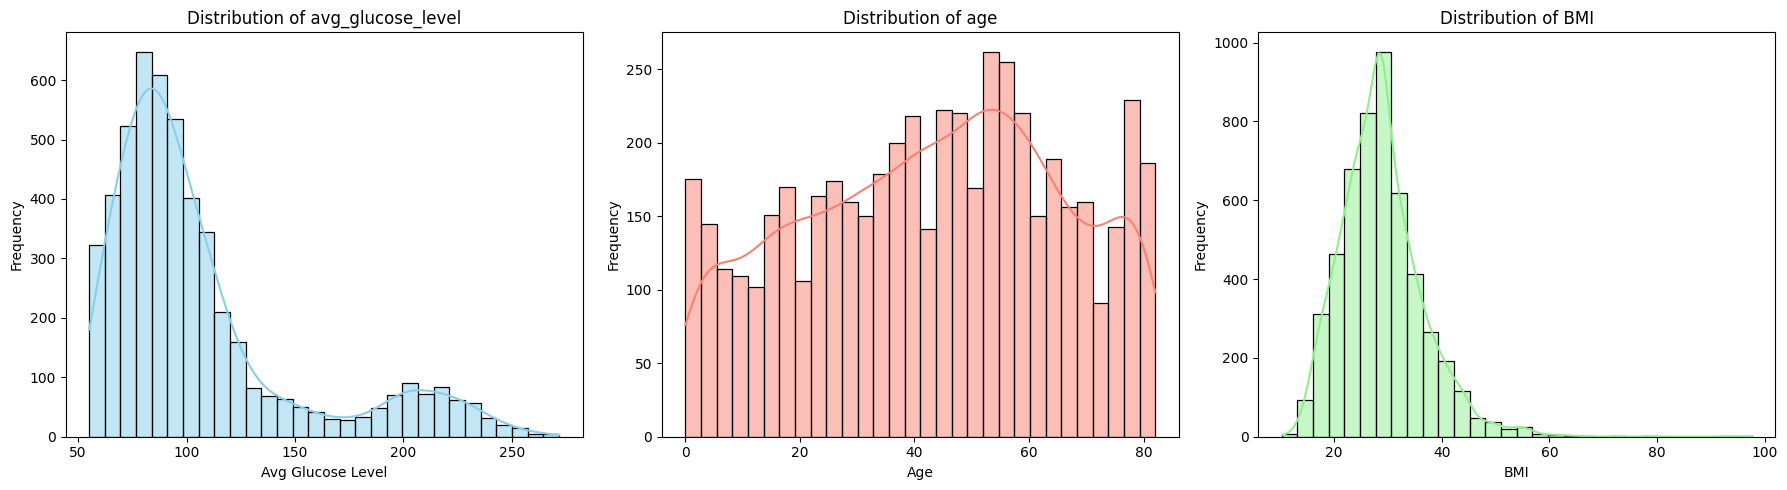

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 hàng, 3 cột

sns.histplot(df["avg_glucose_level"], bins=30, kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Distribution of avg_glucose_level")
axes[0].set_xlabel("Avg Glucose Level")
axes[0].set_ylabel("Frequency")

sns.histplot(df["age"], bins=30, kde=True, color="salmon", ax=axes[1])
axes[1].set_title("Distribution of age")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Frequency")

sns.histplot(df["bmi"].dropna(), bins=30, kde=True, color="lightgreen", ax=axes[2])
axes[2].set_title("Distribution of BMI")
axes[2].set_xlabel("BMI")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


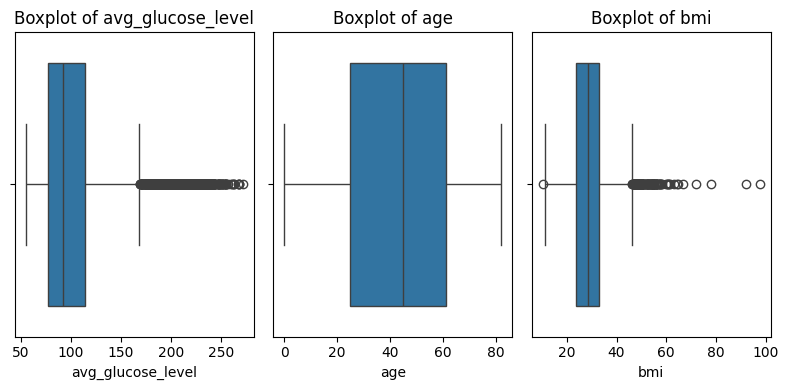

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(8, 4))

sns.boxplot(x=df["avg_glucose_level"], ax=axes[0])
axes[0].set_title('Boxplot of avg_glucose_level')

sns.boxplot(x=df["age"], ax=axes[1])
axes[1].set_title('Boxplot of age')

sns.boxplot(x=df["bmi"], ax=axes[2])
axes[2].set_title('Boxplot of bmi')

plt.tight_layout()
plt.show()

#### Xử lí outlier

Nhận xét: Có biểu đồ bị lệch phải, và xuất hiện rất nhiều giá trị outlier ở nhiều cột. Do đó, chúng em quyết định sử dụng Robust Scaler.

Ngoài ra, đối với thuật toán K-NN chúng em sẽ xử lí Curse Dimension bằng cách Min-max Scale, và sẽ so sánh sự hiệu quả với trước khi Min-max.

### avg_glucose_level

In [ ]:
df.loc[df['avg_glucose_level'] > 169.35750000000002, 'avg_glucose_level'] = 169.35750000000002

### bmi

In [ ]:
df.loc[df['bmi'] > 47.5, 'bmi'] = 47.5

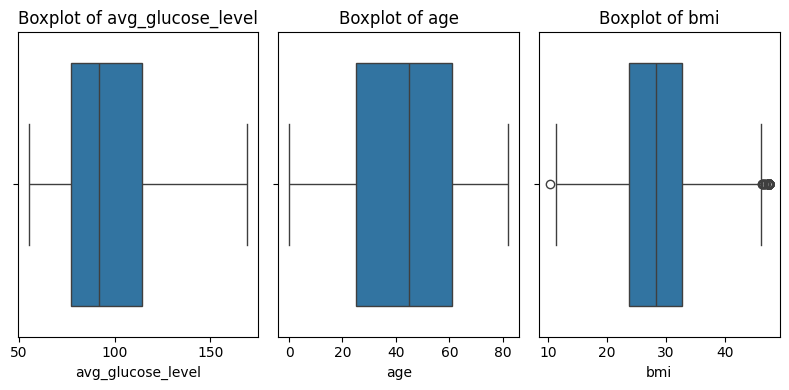

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(8, 4))

sns.boxplot(x=df["avg_glucose_level"], ax=axes[0])
axes[0].set_title('Boxplot of avg_glucose_level')

sns.boxplot(x=df["age"], ax=axes[1])
axes[1].set_title('Boxplot of age')

sns.boxplot(x=df["bmi"], ax=axes[2])
axes[2].set_title('Boxplot of bmi')

plt.tight_layout()
plt.show()

### Phân phối của lớp cần dự đoán

In [ ]:
# Đếm số giá trị unique trong cột stroke
unique_values = df['stroke'].nunique()
print(f"Số giá trị unique trong cột 'stroke': {unique_values}")

# Đếm số hàng cho từng giá trị trong cột stroke
value_counts = df['stroke'].value_counts()
print("Số hàng cho mỗi giá trị trong cột 'stroke':")
print(value_counts)

Số giá trị unique trong cột 'stroke': 2
Số hàng cho mỗi giá trị trong cột 'stroke':
stroke
0    4861
1     249
Name: count, dtype: int64


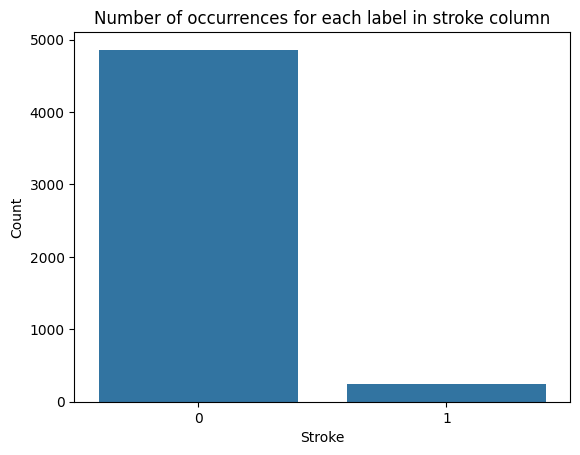

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='stroke', data=df)
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title('Number of occurrences for each label in stroke column')
plt.show()

Nhận xét: Nhãn 1 chỉ chiếm khoảng 4.9% tổng dữ liệu. Đây là tình trạng imbalanced dataset (dữ liệu mất cân bằng) khá rõ. Do đó chúng em sẽ xử lí bằng cách sử dụng SMOTE và kĩ thuật feature engineering.

### Encode

Vì các feature có kiểu dữ liệu categorical có nhiều nhất là 5 nhãn, không quá ảnh hưởng tới các mô hình nên sẽ sử dụng Label Encoder

### Biểu đồ Heatmap

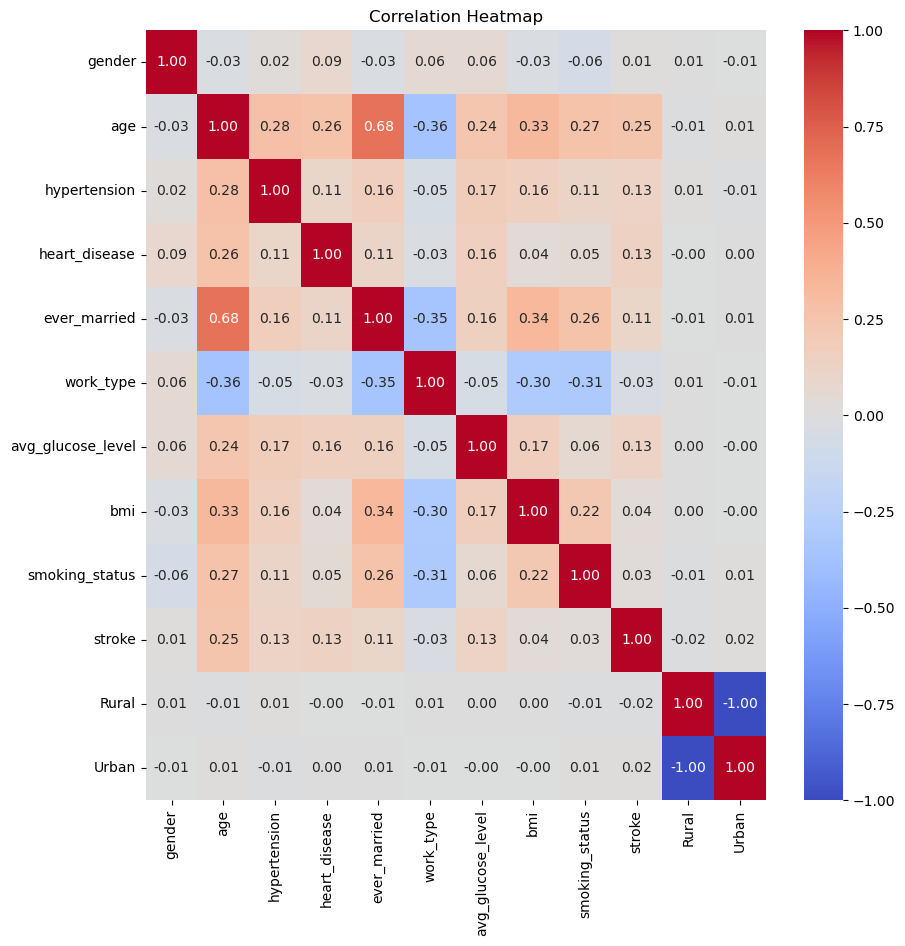

Nhận xét: Cột age và cột ever-married có chỉ số tương quan lớn nhất, hoàn toàn hợp lí. Tuy nhiên chỉ số correlation vẫn chỉ là 0.68, chưa đủ mức 0.8 để ta phải đắn đo xem nên bỏ cột nào trong hai cột này, và các cột khác cũng thế.

# DATA PREPROCESSING

## Loại bỏ code id

In [ ]:
df.drop(['id'],axis=1,inplace=True)

## Xử lí Outlier

In [ ]:
def cap_outliers_iqr(df, column):
    """
    Giới hạn outlier trong cột theo phương pháp IQR.

    Parameters:
    - df: DataFrame
    - column: tên cột (string)

    Trả về DataFrame với cột đã được giới hạn outlier.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

In [ ]:
import pandas as pd

# Giả sử df là DataFrame của bạn
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
print(outliers[['age']])

Empty DataFrame
Columns: [age]
Index: []


## FEngi

In [ ]:
age_threshold = df['age'].quantile(0.90)  # Ngưỡng 95% của tuổi
df['high_age'] = (df['age'] > age_threshold).astype(int)

## Robust Scaler

In [ ]:
from sklearn.preprocessing import RobustScaler

cols_to_scale = ["age", "avg_glucose_level", "bmi"]

scaler = RobustScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Xuất tên cột và hệ số scale
scaling_info = {col: {"center": center, "scale": scale}
                for col, center, scale in zip(cols_to_scale, scaler.center_, scaler.scale_)}

print(scaling_info)


{'age': {'center': np.float64(45.0), 'scale': np.float64(36.0)}, 'avg_glucose_level': {'center': np.float64(91.88499999999999), 'scale': np.float64(36.845)}, 'bmi': {'center': np.float64(28.4), 'scale': np.float64(8.999999999999996)}}


## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = df.columns.difference(cols_to_scale)
print(cols_to_encode)

encoder = LabelEncoder()
label_mappings = {}

for col in cols_to_encode:
    df[col] = encoder.fit_transform(df[col])
    # Lưu mapping nhãn gốc sang nhãn mới
    mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
    label_mappings[col] = mapping

# In ra bảng ánh xạ nhãn cho từng cột
for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for original_label, encoded_label in mapping.items():
        print(f"  {original_label} -> {encoded_label}")
    print()


Index(['Residence_type', 'ever_married', 'gender', 'heart_disease', 'high_age',
       'hypertension', 'smoking_status', 'stroke', 'work_type'],
      dtype='object')
Column: Residence_type
  Rural -> 0
  Urban -> 1

Column: ever_married
  No -> 0
  Yes -> 1

Column: gender
  Female -> 0
  Male -> 1
  Other -> 2

Column: heart_disease
  0 -> 0
  1 -> 1

Column: high_age
  0 -> 0
  1 -> 1

Column: hypertension
  0 -> 0
  1 -> 1

Column: smoking_status
  Unknown -> 0
  formerly smoked -> 1
  never smoked -> 2
  smokes -> 3

Column: stroke
  0 -> 0
  1 -> 1

Column: work_type
  Govt_job -> 0
  Never_worked -> 1
  Private -> 2
  Self-employed -> 3
  children -> 4



In [ ]:
for col in cols_to_encode:
    print("col:", col, "- unique values:", df[col].unique())

df.head(5)

col: Residence_type - unique values: [1 0]
col: ever_married - unique values: [1 0]
col: gender - unique values: [1 0 2]
col: heart_disease - unique values: [1 0]
col: high_age - unique values: [0 1]
col: hypertension - unique values: [0 1]
col: smoking_status - unique values: [1 2 3 0]
col: stroke - unique values: [1 0]
col: work_type - unique values: [2 3 0 4 1]


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,high_age
0,1,0.611111,0,1,1,2,1,2.10266,0.911111,1,1,0
1,0,0.444444,0,0,1,3,0,2.10266,0.054804,2,1,0
2,1,0.972222,0,1,1,2,0,0.38092,0.455556,2,1,1
3,0,0.111111,0,0,1,2,1,2.10266,0.666667,3,1,0
4,0,0.944444,1,0,1,3,0,2.10266,-0.488889,2,1,1


## Chia file train và test

In [ ]:
from sklearn.model_selection import train_test_split

# Tách tập train và test (70:30) với stratify
X = df.drop(columns=["stroke"])
y = df["stroke"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Tiếp tục tách từ tập train thành train (70%) và valid (15%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.176, random_state=42, stratify=y_train
)

print(f"Tập train: {X_train.shape}, Tập valid: {X_val.shape}, Tập test: {X_test.shape}")
print("\nTỉ lệ nhãn trong tập train:")
print(y_train.value_counts(normalize=True))
print("\nTỉ lệ nhãn trong tập valid:")
print(y_val.value_counts(normalize=True))
print("\nTỉ lệ nhãn trong tập test:")
print(y_test.value_counts(normalize=True))

Tập train: (2947, 11), Tập valid: (630, 11), Tập test: (1533, 11)

Tỉ lệ nhãn trong tập train:
stroke
0    0.951476
1    0.048524
Name: proportion, dtype: float64

Tỉ lệ nhãn trong tập valid:
stroke
0    0.950794
1    0.049206
Name: proportion, dtype: float64

Tỉ lệ nhãn trong tập test:
stroke
0    0.951076
1    0.048924
Name: proportion, dtype: float64


# HUẨN LUYỆN SIÊU THAM SỐ

Best k: {'n_neighbors': 14}
Best accuracy: 0.9514765042732583

Validation set performance:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       599
           1       0.00      0.00      0.00        31

    accuracy                           0.95       630
   macro avg       0.48      0.50      0.49       630
weighted avg       0.90      0.95      0.93       630



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


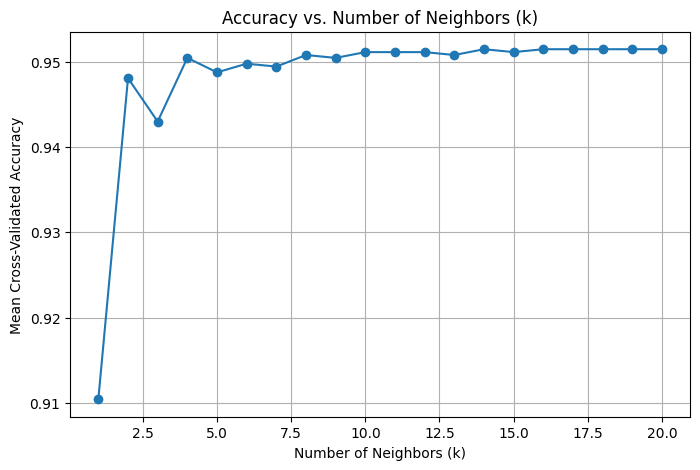

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Khởi tạo mô hình KNN
knn = KNeighborsClassifier()

# Tạo danh sách k cần thử (từ 1 đến 20)
param_grid = {'n_neighbors': list(range(1, 21))}

# Grid search với 5-fold cross-validation
grid_search = GridSearchCV(
    knn,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best k:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

# Đánh giá trên tập validation
y_val_pred = grid_search.best_estimator_.predict(X_val)
print("\nValidation set performance:")
print(classification_report(y_val, y_val_pred))

# Vẽ biểu đồ accuracy theo k
mean_test_scores = grid_search.cv_results_['mean_test_score']
k_values = grid_search.cv_results_['param_n_neighbors']

plt.figure(figsize=(8,5))
plt.plot(k_values, mean_test_scores, marker='o')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_test_pred = grid_search.best_estimator_.predict(X_test)
print("Accuracy trên tập test:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Accuracy trên tập test: 0.9510763209393346
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
df.dtypes

,0
gender,int64
age,float64
hypertension,int64
heart_disease,int64
ever_married,int64
work_type,int64
Residence_type,int64
avg_glucose_level,float64
bmi,float64
smoking_status,int64


## Code from scratch KNN

In [ ]:
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

class KNNClassifier:
    def __init__(self, k=15):
        self.k = k

    def fit(self, X_train, y_train):
        # Chuẩn hóa dữ liệu train
        self.scaler = StandardScaler()
        self.X_train = self.scaler.fit_transform(X_train)
        self.y_train = y_train.values if hasattr(y_train, 'values') else y_train

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X_test):
        # Chuẩn hóa dữ liệu test bằng scaler đã fit trên train
        X_test_scaled = self.scaler.transform(X_test)
        y_pred = []
        for x in X_test_scaled:
            distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common = Counter(k_nearest_labels).most_common(1)[0][0]
            y_pred.append(most_common)
        return np.array(y_pred)

# Sử dụng
knn = KNNClassifier(k=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy

print(f"Accuracy trên tập test: {accuracy:.4f}")
print(f"Error rate trên tập test: {error_rate:.4f}")

Accuracy trên tập test: 0.9504
Error rate trên tập test: 0.0496


## Áp dụng kĩ thuật SMOTE lên tập train

In [ ]:
from imblearn.over_sampling import SMOTE

# Khởi tạo SMOTE
smote = SMOTE(random_state=42)

# Áp dụng SMOTE lên tập train
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Tập train sau SMOTE: {X_train_resampled.shape}, {y_train_resampled.shape}")
print("Tỉ lệ nhãn sau SMOTE:")
print(y_train_resampled.value_counts(normalize=True))

Tập train sau SMOTE: (5608, 11), (5608,)
Tỉ lệ nhãn sau SMOTE:
stroke
0    0.5
1    0.5
Name: proportion, dtype: float64


# XỬ LÝ IMBALANCE

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def comp_model(X_train, y_train, X_test, y_test, metrics):

  models = {
      "LR": LogisticRegression(random_state=42, max_iter=1000),
      "DTree": DecisionTreeClassifier(random_state=42),
      "KNN": KNeighborsClassifier(),
      "Svm": SVC(random_state=42, probability=True),
      "RForest": RandomForestClassifier(random_state=42)
  }

  train_scores = {metric: [] for metric in metrics}
  test_scores = {metric: [] for metric in metrics}

  # Huấn luyện và đánh giá các mô hình
  for name, model in models.items():
      model.fit(X_train, y_train)

      # Dự đoán
      y_train_pred = model.predict(X_train)
      y_test_pred = model.predict(X_test)
      y_train_proba = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else None
      y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

      # Tính các độ đo lỗi
      train_scores["Accuracy"].append(accuracy_score(y_train, y_train_pred))
      train_scores["F1 Score"].append(f1_score(y_train, y_train_pred))
      train_scores["AUC"].append(roc_auc_score(y_train, y_train_proba) if y_train_proba is not None else 0)

      test_scores["Accuracy"].append(accuracy_score(y_test, y_test_pred))
      test_scores["F1 Score"].append(f1_score(y_test, y_test_pred))
      test_scores["AUC"].append(roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else 0)

  plt.figure(figsize=(8, 6))
  for i, metric in enumerate(metrics):
      plt.subplot(2, 3, i + 1)
      sns.barplot(x=list(models.keys()), y=train_scores[metric], color="skyblue", label="Train", width=0.5)
      sns.barplot(x=list(models.keys()), y=test_scores[metric], color="salmon", alpha=0.8, label="Test", width=0.5)
      plt.title(metric, fontsize=12)
      plt.xticks(rotation=45, fontsize=9)
      plt.ylabel(metric, fontsize=10)
      plt.legend(fontsize=9)
  plt.tight_layout()
  plt.subplots_adjust(hspace=0.3, wspace=0.3)
  plt.show()


## Trước khi sử dụng SMOTE

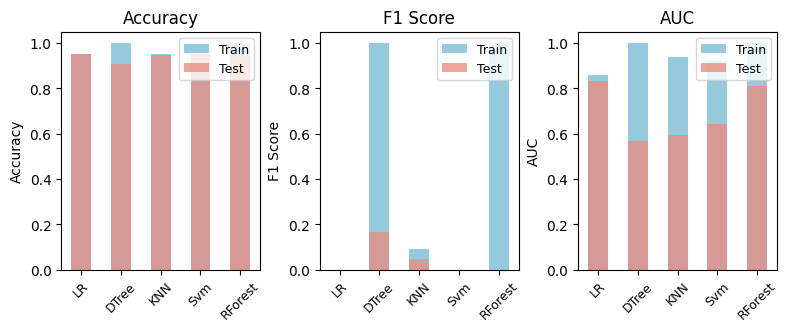

In [ ]:
metrics = ["Accuracy", "F1 Score",  "AUC"]
comp_model(X_train, y_train, X_test, y_test, metrics)

## Sau khi sử dụng SMOTE

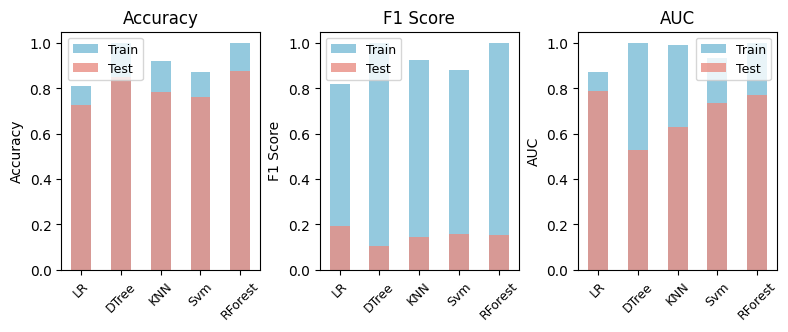

In [ ]:
metrics = ["Accuracy", "F1 Score",  "AUC"]
comp_model(X_train_resampled, y_train_resampled, X_test, y_test, metrics)

## Áp dụng kĩ thuật Borderline-SMOTE

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
borderline_smote = BorderlineSMOTE(random_state=42, kind='borderline-2')
X_train_2, y_train_2 = borderline_smote.fit_resample(X_train, y_train)

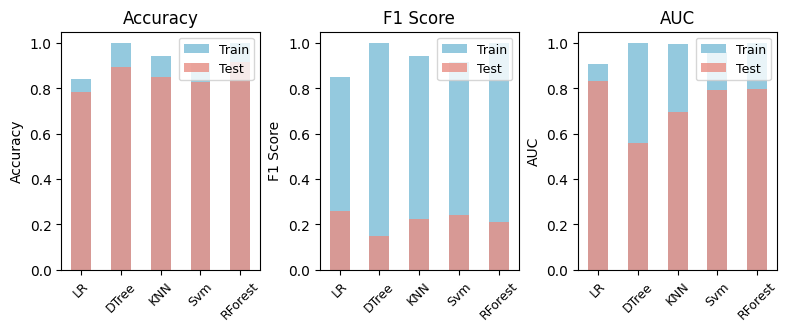

In [ ]:
metrics = ["Accuracy", "F1 Score",  "AUC"]
comp_model(X_train_2, y_train_2, X_test, y_test, metrics)

## SVMSMOTE

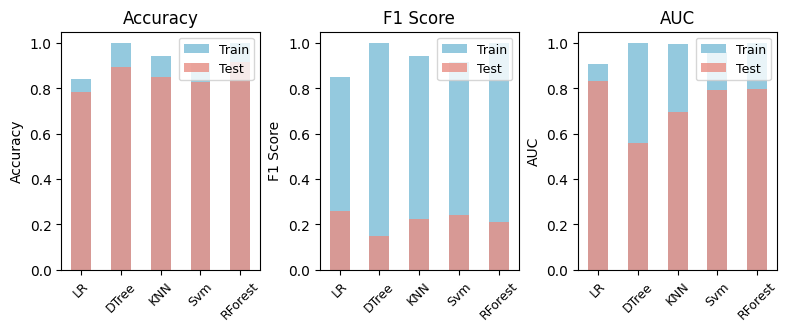

In [ ]:
from imblearn.over_sampling import SVMSMOTE
svm_smote = SVMSMOTE(random_state=42)
X_train_3, y_train_3 = svm_smote.fit_resample(X_train, y_train)
metrics = ["Accuracy", "F1 Score",  "AUC"]
comp_model(X_train_2, y_train_2, X_test, y_test, metrics)

Nhận xét: Có vẻ kĩ thuật Borderline-SMOTE cho ra kết quả khả quan nhất, do đó ta sẽ lựa chọn kĩ thuật này.

# HUẤN LUYỆN SIÊU THAM SỐ

# FEATURE ENGINEERING

### Đánh giá tầm quan trọng của các feature

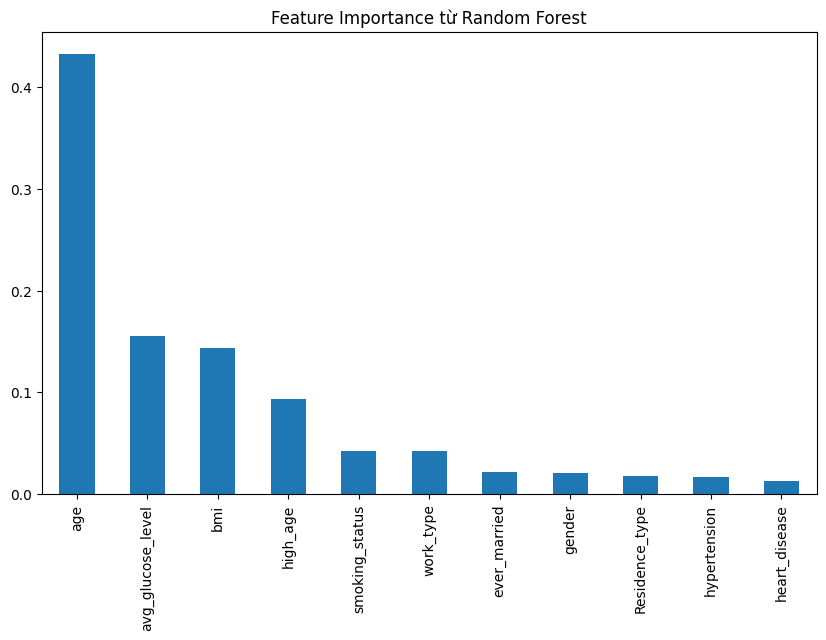

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_2, y_train_2)
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_importances.plot(kind='bar')
plt.title("Feature Importance từ Random Forest")
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, f1_score

model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_2, y_train_2)
y_pred = model.predict(X_test)

# Tính các độ đo
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9087
Precision: 0.1348
F1 Score: 0.1463


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:10:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
X_train_2.shape

(5608, 11)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:10:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


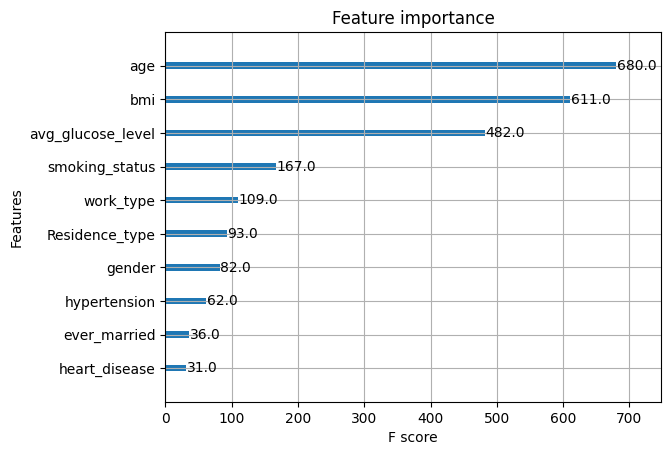

In [ ]:
import xgboost as xgb

# Huấn luyện mô hình XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_2, y_train_2)

# Vẽ biểu đồ importance
xgb.plot_importance(xgb_model, importance_type="weight", max_num_features=10)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
import joblib

model = LogisticRegression()
model.fit(X_train_2, y_train_2)
joblib.dump(model, 'logistic_model.joblib')
model_loaded = joblib.load('logistic_model.joblib')



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import joblib

knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train_2, y_train_2)
joblib.dump(knn_model, 'knn_model.joblib')
knn_model_loaded = joblib.load('knn_model.joblib')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import joblib

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_2, y_train_2)
joblib.dump(dt_model, 'decision_tree_model.joblib')
dt_model_loaded = joblib.load('decision_tree_model.joblib')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import joblib

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_2, y_train_2)
joblib.dump(rf_model, 'random_forest_model.joblib')
rf_model_loaded = joblib.load('random_forest_model.joblib')

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Giả sử bạn đã có X_train, y_train, X_test, y_test rồi

model = RandomForestClassifier()
model.fit(X_train_2, y_train_2)

probs = model.predict_proba(X_test)[:, 1]

print(probs[:100])  # In 100 xác suất đầu tiên

thresholds = np.arange(0, 0.5, 0.05)
for t in thresholds:
    y_pred = (probs >= t).astype(int)
    print(f"Threshold: {t:.2f} - Precision: {precision_score(y_test, y_pred):.3f} - Recall: {recall_score(y_test, y_pred):.3f} - F1: {f1_score(y_test, y_pred):.3f}")


[0.05 0.   0.   0.   0.01 0.   0.   0.05 0.   0.04 0.05 0.   0.   0.11
 0.   0.01 0.17 0.23 0.02 0.12 0.   0.   0.39 0.   0.   0.   0.   0.
 0.28 0.05 0.   0.08 0.01 0.15 0.02 0.01 0.06 0.06 0.04 0.01 0.48 0.
 0.67 0.   0.5  0.34 0.   0.   0.37 0.   0.   0.27 0.01 0.   0.   0.28
 0.02 0.08 0.   0.   0.   0.63 0.08 0.01 0.13 0.1  0.1  0.48 0.78 0.01
 0.02 0.02 0.   0.32 0.01 0.   0.   0.71 0.02 0.   0.   0.34 0.01 0.
 0.01 0.   0.24 0.27 0.13 0.16 0.   0.48 0.37 0.86 0.06 0.11 0.01 0.
 0.   0.24]
Threshold: 0.00 - Precision: 0.049 - Recall: 1.000 - F1: 0.093
Threshold: 0.05 - Precision: 0.107 - Recall: 0.840 - F1: 0.190
Threshold: 0.10 - Precision: 0.133 - Recall: 0.813 - F1: 0.229
Threshold: 0.15 - Precision: 0.152 - Recall: 0.693 - F1: 0.249
Threshold: 0.20 - Precision: 0.173 - Recall: 0.680 - F1: 0.276
Threshold: 0.25 - Precision: 0.181 - Recall: 0.600 - F1: 0.278
Threshold: 0.30 - Precision: 0.186 - Recall: 0.493 - F1: 0.270
Threshold: 0.35 - Precision: 0.178 - Recall: 0.373 - F1: 0

In [ ]:
X_train.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,high_age
1809,1,-0.888889,0,0,0,2,0,0.205048,-0.822222,2,0
2725,0,-0.916667,0,0,0,4,0,1.578097,-0.022222,2,0
1194,0,-1.166667,0,0,0,4,1,-0.332610,0.054804,0,0
1488,0,-1.111111,0,0,0,4,1,1.007599,-1.244444,0,0
3615,1,-0.416667,0,0,1,2,0,0.349708,-1.022222,3,0


In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

# Giả sử bạn đã có X_train, y_train, X_test, y_test

# Khởi tạo SVM với xác suất (probability=True) nếu bạn muốn dùng predict_proba, hoặc dùng decision_function
model = SVC(probability=True)  # Nếu bạn muốn dùng predict_proba, bật probability=True
model.fit(X_train_2, y_train_2)

# Nếu dùng predict_proba:
probs = model.predict_proba(X_test)[:, 1]

# Hoặc nếu dùng decision_function:
# probs = model.decision_function(X_test)
# Nếu dùng decision_function, nó trả về giá trị liên tục có thể âm hoặc dương, bạn có thể chuẩn hóa lại nếu muốn

thresholds = np.arange(0.75, 0.8, 0.005)  # Vì probs từ 0 đến 1 (predict_proba)
for t in thresholds:
    y_pred = (probs >= t).astype(int)
    print(f"Threshold: {t:.2f} - Precision: {precision_score(y_test, y_pred):.3f} - Recall: {recall_score(y_test, y_pred):.3f} - F1: {f1_score(y_test, y_pred):.3f}")

Threshold: 0.75 - Precision: 0.191 - Recall: 0.347 - F1: 0.246
Threshold: 0.76 - Precision: 0.193 - Recall: 0.347 - F1: 0.248
Threshold: 0.76 - Precision: 0.195 - Recall: 0.347 - F1: 0.250
Threshold: 0.77 - Precision: 0.198 - Recall: 0.347 - F1: 0.252
Threshold: 0.77 - Precision: 0.200 - Recall: 0.347 - F1: 0.254
Threshold: 0.78 - Precision: 0.200 - Recall: 0.347 - F1: 0.254
Threshold: 0.78 - Precision: 0.200 - Recall: 0.347 - F1: 0.254
Threshold: 0.79 - Precision: 0.202 - Recall: 0.347 - F1: 0.255
Threshold: 0.79 - Precision: 0.197 - Recall: 0.333 - F1: 0.248
Threshold: 0.80 - Precision: 0.198 - Recall: 0.333 - F1: 0.249
Threshold: 0.80 - Precision: 0.200 - Recall: 0.333 - F1: 0.250
